# Initializing

In [1]:
import scipy as sp
import pylab as pl
import cmath as cm

def f(x):
    return sp.sin(x)
# f = (lambda x: sp.sin(6*x) + sp.cos(5*x))

def g(x):
    return sp.cos(x)

N = 256
period = cm.pi * 2

x_array = sp.arange(0, period, (period / N))
f_y = sp.vectorize(f)(x_array)
g_y = sp.vectorize(g)(x_array)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, f_y)
pl.title("f(x)")
# pl.axhline(linewidth=2, color="black")
# pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, g_y)
pl.title("g(x)")
pl.grid()
# pl.axhline(linewidth=2, color="black")
# pl.axvline(linewidth=2, color="black")
pl.show()

## Fast Fourier Transformation

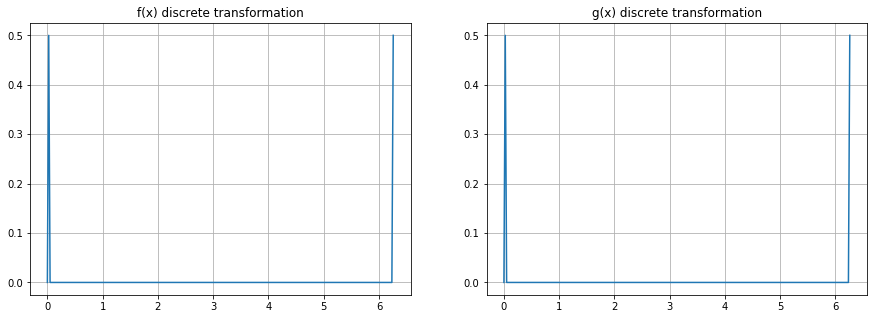

In [2]:
def fast_transformation(f, N, period):
    source_data = []
    float_n = float(N)
    for i in range(N):
        source_data.append(complex(f(period * i/float_n)))
    result = fast_transformation_recursive(source_data, period)
    return [x/N for x in result]

def fast_transformation_recursive(data_set, period):
    n = len(data_set)
    if n == 1: 
        return data_set
    even, odd = [], []
    for i in range(n):
        if i%2 == 0:
            even.append(data_set[i])
        else:
            odd.append(data_set[i])
            
    even_result = fast_transformation_recursive(even, period)
    odd_result = fast_transformation_recursive(odd, period)
    result = [0+0j] * n
    Wn = complex(sp.cos(period / n), sp.sin(period / n))
    w = complex(1, 0)
    for i in range(n / 2):
        result[i] = even_result[i] + w * odd_result[i]
        result[i + n / 2] = even_result[i] - w * odd_result[i]
        w *= Wn
    return result

f_transformed = fast_transformation(f, N, period)
f_transformed_y = map(lambda (x): abs(x), f_transformed)

g_transformed = fast_transformation(g, N, period)
g_transformed_y = map(lambda (x): abs(x), g_transformed)


pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, f_transformed_y)
pl.title("f(x) discrete transformation")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, g_transformed_y)
pl.title("g(x) discrete transformation")
pl.grid()
pl.show()

# Korrelation

In [3]:
f_transformed_conjugate = map(lambda(x): x.conjugate(), f_transformed)

fg_korrelation_transformed = sp.multiply(f_transformed_conjugate, g_transformed)
# print(f_transformed_conjugate)
# print(g_transformed)
# print(fg_korrelation_transformed)

# Convolution

In [4]:
fg_convolution_transformed = sp.multiply(f_transformed, g_transformed)

# Reversed Fourier Transformation

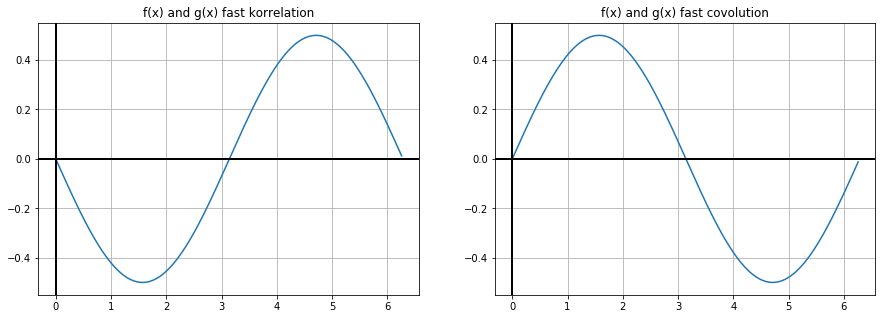

In [5]:
def reverse_transformation(data, n, period):
    result = []
    float_n = float(n)
    for i in range(n):
        result.append(0)
        for j in range(n):
            result[i] += (data[j] * complex(
                sp.cos(i * period * (-j/float_n)),
                sp.sin(i * period * (-j/float_n))
            )).real
    return result

fg_korrelation = reverse_transformation(fg_korrelation_transformed, N, period)
fg_convolution = reverse_transformation(fg_convolution_transformed, N, period)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, fg_korrelation)
pl.title("f(x) and g(x) fast korrelation")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, fg_convolution)
pl.title("f(x) and g(x) fast covolution")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()
pl.show()

# Classic version

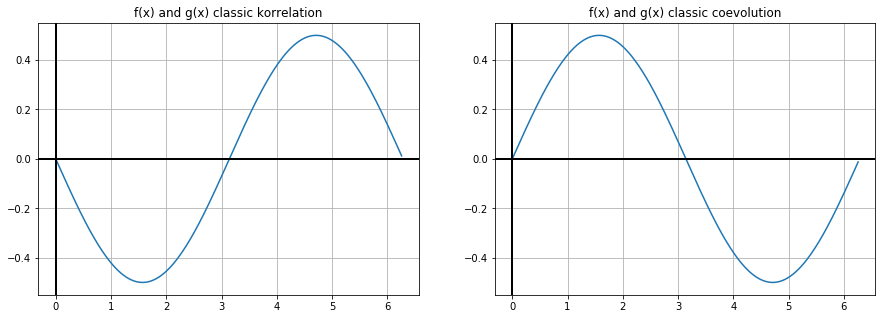

In [6]:
def korrelation(f, g, N, period):
    kor = []
    float_n = float(N)
    for i in range(N):        
        kor.append(0)
        for j in range(N):
            kor[i] += f(period * (j/float_n)) * (g(period * (((i+j)%N) / float_n)))
    return [x/N for x in kor]

def convolution(f, g, N, period):
    kor = []
    float_n = float(N)
    for i in range(N):        
        kor.append(0)
        for j in range(N):
            g_x = (i-j) % N
            if (g_x < 0):
                g_x *= -1
            kor[i] += f(period * (j/float_n)) * (g(period * (g_x / float_n)))
    return [x/N for x in kor]   

classic_korrelation = korrelation(f, g, N, period)
classic_convolution = convolution(f, g, N, period)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, classic_korrelation)
pl.title("f(x) and g(x) classic korrelation")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, classic_convolution)
pl.title("f(x) and g(x) classic coevolution")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.show()                                       
    